## Modelling income with demographic data



---



This notebook contains all exploratory data analysis for the ```income_dataset_finalized.csv``` data found [here](https://drive.google.com/file/d/1VZ7FUfcy8r-GUFtVdijPRwbdkcOL4WLr/view)

### 0: EDA and data preprocessing

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set path
PATH = "/Users/sb/git/UW-data-analysis-study/csvs/"

# Load data
df = pd.read_csv(PATH+'income_dataset_finalized.csv')

In [6]:
df.head()

,Participant,Race,Sex,Age,State,Community,Highest Edu,Student status,Major,Employment,Marital status,Housing,Income
0,100005,White,Female,53,Iowa,Rural,Four year college or university degree/Bachelo...,No,Business/management/finance/marketing/accounti...,Part-time,Married,Own,$75K to under $100K
1,100062,White,Male,50,South Carolina,Suburban,Some college-no degree (includes some communit...,No,NaN,Part-time,Never been married,Own,$30K to under $40K
2,100116,White,Female,53,Minnesota,Suburban,Two year associate degree from a college or un...,No,Vocational/technical,Part-time,Never been married,Own,$10K to under $20K
3,100125,White,Male,80,Iowa,Rural,High school graduate (Grade 12 with diploma or...,NaN,NaN,Retired,Widowed,Rent,Don't know/Refused
4,100131,White,Female,80,New Jersey,Suburban,Some college-no degree (includes some communit...,NaN,NaN,Retired,Divorced,Own,$30K to under $40K


In [7]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 13 columns):
Participant       447 non-null int64
Race              447 non-null object
Sex               447 non-null object
Age               447 non-null object
State             447 non-null object
Community         447 non-null object
Highest Edu       447 non-null object
Student status    329 non-null object
Major             220 non-null object
Employment        447 non-null object
Marital status    447 non-null object
Housing           447 non-null object
Income            447 non-null object
dtypes: int64(1), object(12)
memory usage: 45.5+ KB


In [8]:
# Treat the null entries as new categories
df.fillna("None", inplace=True)

In [9]:
# Unique Income classes
df['Income'].unique()

array(['$75K to under $100K', '$30K to under $40K', '$10K to under $20K',
       "Don't know/Refused", '$20K to under $30K', '$100K to under $150',
       '$40K to under $50K', 'Less than $10K', '$50K to under $75K',
       '$150K or more'], dtype=object)

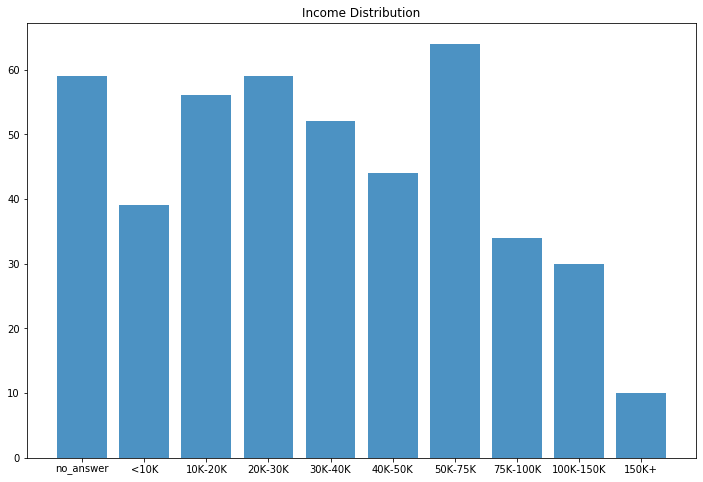

In [10]:
ordered_incomes= [
    "Don't know/Refused",
    'Less than $10K',  '$10K to under $20K',
    '$20K to under $30K','$30K to under $40K',
    '$40K to under $50K','$50K to under $75K',
    '$75K to under $100K', '$100K to under $150',
    '$150K or more'
]

income_list = [df[df.Income==inc].Participant.count() for inc in ordered_incomes]

labels = ["no_answer",'<10K','10K-20K','20K-30K','30K-40K','40K-50K',
          '50K-75K','75K-100K','100K-150K','150K+']

# Plot bar chart showing class distribution 
plt.figure(figsize=(12,8))
plt.title('Income Distribution')
plt.bar(labels, income_list, alpha=.8);

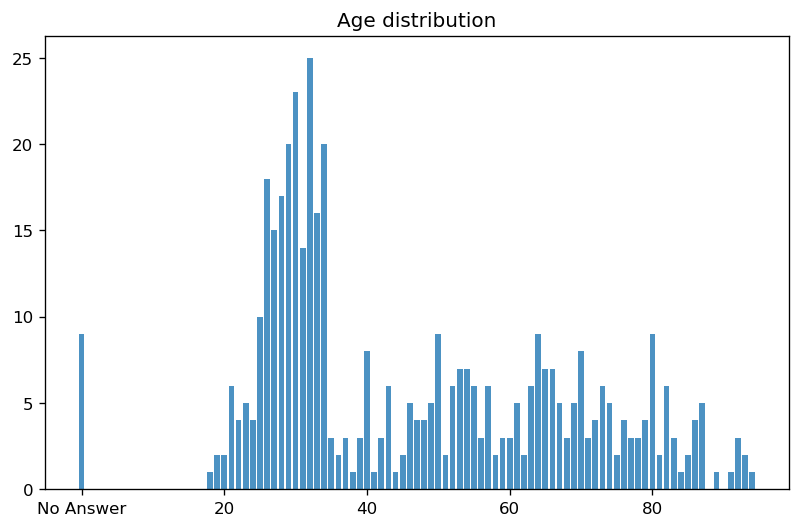

In [11]:
clean_age = lambda x: int(x) if x!="Don't know/Refused" else 0
df['Clean Age'] = df.Age.apply(clean_age)

clean_ages = [i for i in sorted(df['Clean Age'].unique())]
counter = lambda category: df[df['Clean Age']==category].Participant.count()
age_counts = [counter(category) for category in clean_ages]

plt.figure(figsize=(8,5),dpi=120)
ax=plt.subplot()
ax.set_title("Age distribution")
ax.set_xticks([i for i in range(0,100,20)])
ax.set_xticklabels(['No Answer','20','40','60','80'])
ax.bar(clean_ages, age_counts, alpha=.8);

In [14]:
def class_counts(col):
    """ Returns a list of unique classes and their frequencies """
    labels = df[col].unique().tolist()
    counter = lambda category: df[df[col]==category].Participant.count()
    counts = [counter(category) for category in labels]
    return counts, labels

import plotly.graph_objects as go

def plot_pie(col,plotly=True):
    """ Plot pie chart for a chosen data feature """
    counts,labels = class_counts(col)
    if plotly==False:
        plt.figure(figsize=(8,9),dpi=120)
        plt.title(col)
    plt.pie(counts,labels=labels);
    if plotly:
        fig = go.Figure(data=[go.Pie(labels=labels, values=counts)])
        fig.show()

Plotly interactive plot showing distribution of Race categories


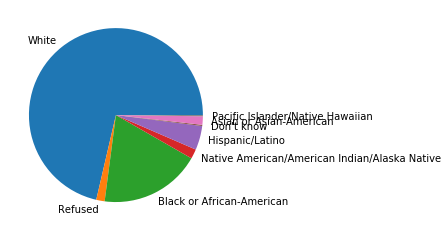

In [15]:
print("Plotly interactive plot showing distribution of Race categories")
plot_pie('Race')

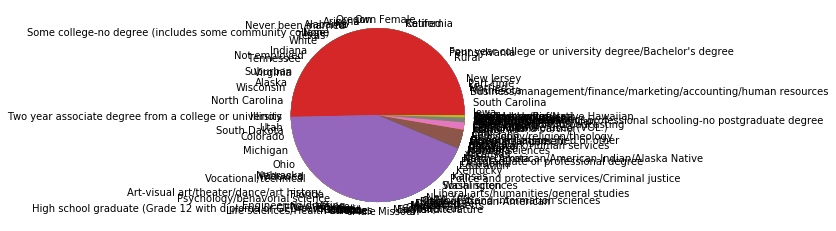

In [16]:
categorical_features = ['Race','Sex','State','Community','Highest Edu', 
                        'Student status','Major','Employment','Marital status','Housing'] 

for col in categorical_features:
    plot_pie(col)